In [1]:
import os
import sys

prj_dir = os.path.abspath(os.getcwd() + '/..')
print(prj_dir)
sys.path.append(prj_dir)

/Users/raul.sanchez/data_scientia/rulo_mota_omath


In [2]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
import shap
import matplotlib.pyplot as plt
from matplotlib.dates import date2num

from src.features import cnbv_inclusion_financiera
from src.features import banxico_mun_income_remittances

In [3]:
data = banxico_mun_income_remittances.get()

In [20]:
is_change_neg_at = [
    'is_change_neg_at_5', 
    'is_change_neg_at_10',
    'is_change_neg_at_25']

is_change_neg_at_title = {
    'is_change_neg_at_5': 'Min. 5% Decrease',
    'is_change_neg_at_10': 'Min. 10% Decrease',
    'is_change_neg_at_25': 'Min. 25% Decrease'}

pos_neg_class_color = {
    1: '#ff220c',
    0: '#84e296'}

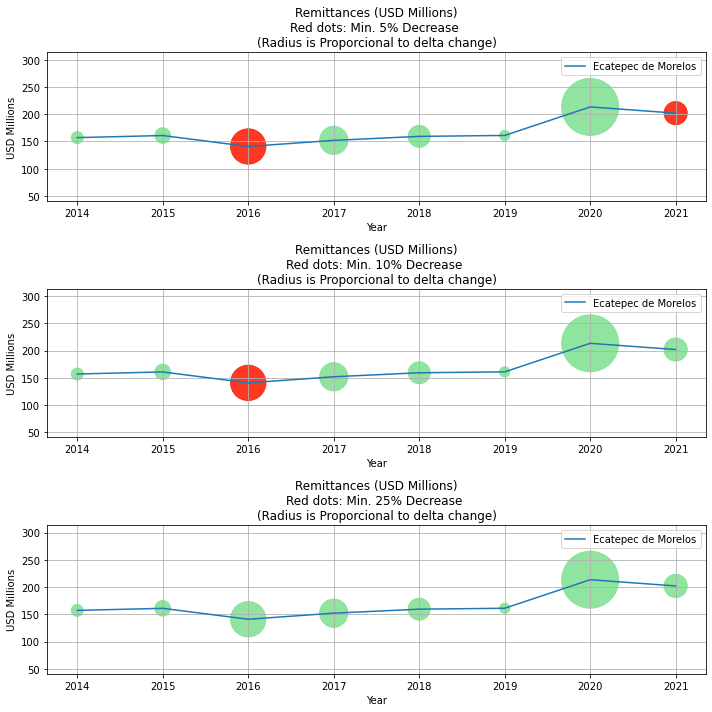

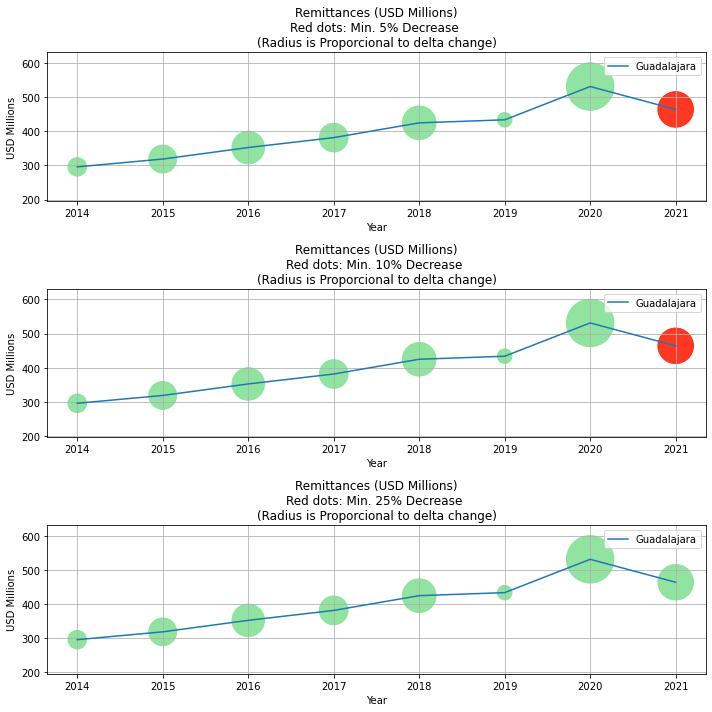

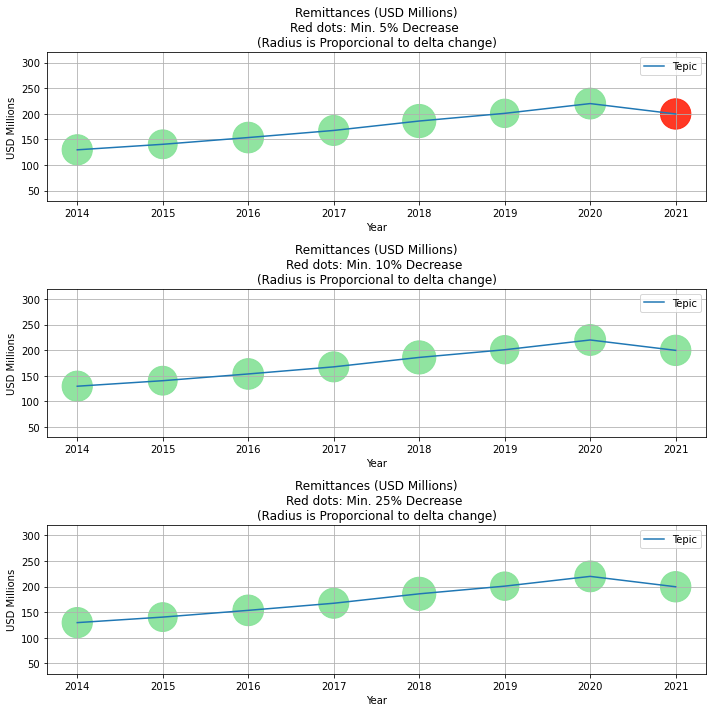

In [25]:
target_municipalities = [
    'Guadalajara',
#     'San Luis Potosí',
#     'León',
#     'Tijuana',
#     'Morelia',
#     'Mexicali',
    'Ecatepec de Morelos',
    'Tepic'
]

remittances_sample = data[data['Municipality'].isin(target_municipalities)]

for mun_id, mun_remittances in remittances_sample.groupby('Municipality'):
    mun_remittance = mun_remittances.set_index('Year')['Remittance Amount Million USD']
    fig, ax = plt.subplots(3, 1, figsize=(10, 10))    
    
    mun_remittance.name = mun_id
    size = mun_remittances['remittance_percent_change'].abs() * 1e+4
    for it, is_change_neg_at_n in enumerate(is_change_neg_at):
        ax[it].scatter(
            x=mun_remittances['Year'],
            y=mun_remittance.values,
            c=mun_remittances[is_change_neg_at_n].apply(
                lambda x: pos_neg_class_color[1] if x else pos_neg_class_color[0]),
            s=size,
            alpha=.9)
        
        mun_remittance.plot(
            grid=True,
            ax=ax[it],
            legend=True)
        
        ax[it].set_ylabel('USD Millions')
        ax[it].set_ylim(mun_remittance.min() - 100, mun_remittance.max() + 100)
        ax[it].set_title((
            'Remittances (USD Millions)\n'
            'Red dots: %s \n'
            '(Radius is Proporcional to delta change)'
        ) % (
            is_change_neg_at_title[is_change_neg_at_n]
        ))
        
    fig.set_tight_layout('tight')

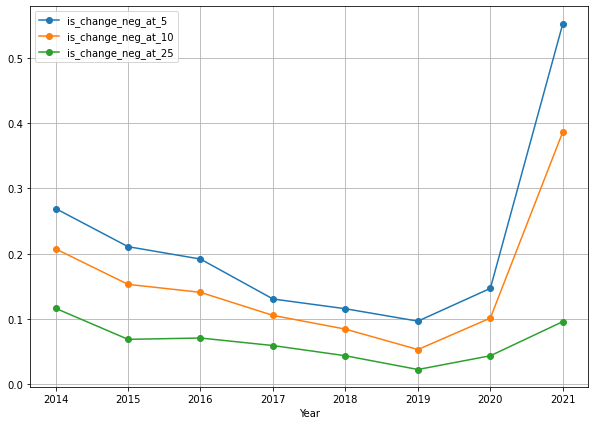

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
for is_change_neg_at_n in is_change_neg_at:
    data.groupby('Year')[is_change_neg_at_n].mean().plot(
        grid=True,
        legend=True,
        marker='o',
        ax=ax)